In [73]:
import tensorflow as tf 
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

In [35]:
## Image encoding and array shape where RGB channels
image_path = './clothing-dataset-small/train/t-shirt/00003aeb-ace5-43bf-9a0c-dc31a03e9cd2.jpg'
img = load_img(image_path, target_size=(299, 299))
x = np.array(img)
x.shape

(299, 299, 3)

In [36]:
# Preprocess the image np array with xception utility
X = np.array([x])

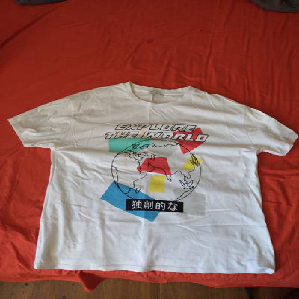

In [37]:
img

In [7]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [38]:
model = Xception(weights='imagenet', input_shape=(299,299, 3))

In [39]:
X = preprocess_input(X)

preds = model.predict(X)

1/1 [==============================] - 1s 843ms/step


In [43]:
## use decode_predictions to read the predictions classes
decode_predictions(preds)

35363/35363 [==============================] - 0s 1us/step


[[('n03595614', 'jersey', 0.88693106),
  ('n02730930', 'apron', 0.006279675),
  ('n04235860', 'sleeping_bag', 0.0059950864),
  ('n04456115', 'torch', 0.005802477),
  ('n03710637', 'maillot', 0.0057547335)]]

In [63]:
train_gen = ImageDataGenerator(preprocessing_function= preprocess_input)
trained_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
     target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [64]:
!ls -l clothing-dataset-small/train

total 256
drwxr-sr-x 2 jovyan jovyan 20480 Dec 19 13:03 dress
drwxr-sr-x 2 jovyan jovyan 12288 Dec 19 13:03 hat
drwxr-sr-x 2 jovyan jovyan 36864 Dec 19 13:03 longsleeve
drwxr-sr-x 2 jovyan jovyan 20480 Dec 19 13:03 outwear
drwxr-sr-x 2 jovyan jovyan 36864 Dec 19 13:03 pants
drwxr-sr-x 2 jovyan jovyan 20480 Dec 19 13:03 shirt
drwxr-sr-x 2 jovyan jovyan 20480 Dec 19 13:03 shoes
drwxr-sr-x 2 jovyan jovyan 20480 Dec 19 13:03 shorts
drwxr-sr-x 2 jovyan jovyan 12288 Dec 19 13:03 skirt
drwxr-sr-x 2 jovyan jovyan 61440 Dec 19 13:03 t-shirt


In [65]:
trained_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [66]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32
)

Found 341 images belonging to 10 classes.


In [44]:
#Basemodel that already pre-trained on Imagenet data
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)

In [46]:
base_model.trainable = False #ConvLayers will not change ( FREEZE )

## Create new top ( Dense layer that fit our dataset 
inputs = keras.Input(shape=(150, 150, 3))
#batch 32 * 5 * 5 * 2048
base = base_model(inputs, training = False)

## Shrink 3d Base into 1D vector
pooling = keras.layers.GlobalAveragePooling2D()
# 32 * 2048
vectors = pooling(base)
# 32 * 10 [ 10 classes ]
outputs = keras.layers.Dense(10)(vectors) # we could add activation layer
model = keras.Model(inputs, outputs)

In [53]:
img = load_img(image_path, target_size=(150, 150))
x = np.array(img)
X = np.array([x])

In [54]:
X = preprocess_input(X)

preds = model.predict(X)

1/1 [==============================] - 1s 626ms/step


In [59]:
preds

array([[ 1.42625   ,  0.09430203, -0.2889111 , -0.39715165, -0.19844294,
         0.07707974,  0.73962927, -1.0503647 ,  0.01190338, -0.07806091]],
      dtype=float32)

### Adding optimizier with loss
- default optimizer is Adam
- use `CategoricalCrossentropy` classification problem

In [67]:
## To train the model, need an optimizer for weights
optimizer = keras.optimizers.Adam(learning_rate=0.01)
# where optimizer make sure it's in the right direction
loss = keras.losses.CategoricalCrossentropy(from_logits=True)  # raw input for softmax activation

In [68]:
model.compile(optimizer, loss=loss, metrics=['accuracy'])
history = model.fit(trained_ds, epochs=10, validation_data = val_ds)

Epoch 1/10
96/96 [==============================] - 16s 139ms/step - loss: 1.3313 - accuracy: 0.6620 - val_loss: 0.8822 - val_accuracy: 0.7595
Epoch 2/10
96/96 [==============================] - 11s 118ms/step - loss: 0.5445 - accuracy: 0.8269 - val_loss: 0.9998 - val_accuracy: 0.7566
Epoch 3/10
96/96 [==============================] - 11s 117ms/step - loss: 0.4173 - accuracy: 0.8670 - val_loss: 0.8119 - val_accuracy: 0.8065
Epoch 4/10
96/96 [==============================] - 11s 117ms/step - loss: 0.2378 - accuracy: 0.9188 - val_loss: 0.8119 - val_accuracy: 0.8006
Epoch 5/10
96/96 [==============================] - 11s 118ms/step - loss: 0.1579 - accuracy: 0.9469 - val_loss: 0.8469 - val_accuracy: 0.8094
Epoch 6/10
96/96 [==============================] - 11s 116ms/step - loss: 0.1141 - accuracy: 0.9628 - val_loss: 0.9294 - val_accuracy: 0.8065
Epoch 7/10
96/96 [==============================] - 11s 116ms/step - loss: 0.0997 - accuracy: 0.9628 - val_loss: 0.9706 - val_accuracy: 0.7889

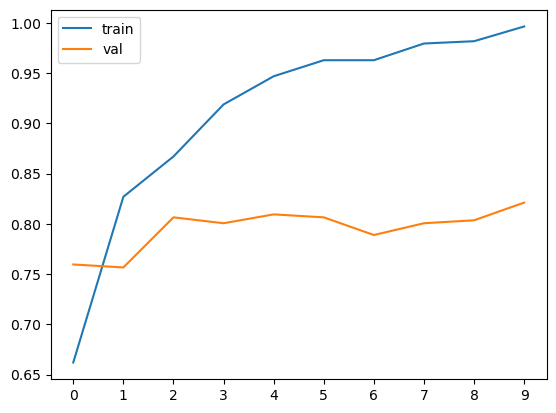

In [75]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## Tune learning rate


In [76]:
def create_model(learningRate = 0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150,150,3)
    )
    base_model.trainable = False #ConvLayers will not change ( FREEZE )


    ## Create new top ( Dense layer that fit our dataset 
    inputs = keras.Input(shape=(150, 150, 3))
    #batch 32 * 5 * 5 * 2048
    base = base_model(inputs, training = False)
    ## Shrink 3d Base into 1D vector
    pooling = keras.layers.GlobalAveragePooling2D()
    # 32 * 2048
    vectors = pooling(base)
    # 32 * 10 [ 10 classes ]
    outputs = keras.layers.Dense(10)(vectors) # we could add activation layer
    model = keras.Model(inputs, outputs)


    ## To train the model, need an optimizer for weights
    optimizer = keras.optimizers.Adam(learning_rate=learningRate)
    # where optimizer make sure it's in the right direction
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer, loss=loss, metrics=['accuracy'])

    return model

In [78]:
scores = {}

for learning_rate in [0.0001, 0.001, 0.01, 0.1]:
    print(learning_rate)

    model = create_model(learningRate = learning_rate) 
    history = model.fit(trained_ds, epochs=10, validation_data = val_ds)
    scores[learning_rate] = history.history

    print()
    print()

0.0001
Epoch 1/10
96/96 [==============================] - 14s 125ms/step - loss: 1.8734 - accuracy: 0.3677 - val_loss: 1.5573 - val_accuracy: 0.5191
Epoch 2/10
96/96 [==============================] - 11s 117ms/step - loss: 1.3580 - accuracy: 0.5724 - val_loss: 1.2351 - val_accuracy: 0.6217
Epoch 3/10
96/96 [==============================] - 11s 117ms/step - loss: 1.1308 - accuracy: 0.6496 - val_loss: 1.0670 - val_accuracy: 0.6774
Epoch 4/10
96/96 [==============================] - 11s 118ms/step - loss: 0.9966 - accuracy: 0.6926 - val_loss: 0.9683 - val_accuracy: 0.6891
Epoch 5/10
96/96 [==============================] - 11s 116ms/step - loss: 0.9101 - accuracy: 0.7070 - val_loss: 0.8949 - val_accuracy: 0.7390
Epoch 6/10
96/96 [==============================] - 11s 116ms/step - loss: 0.8437 - accuracy: 0.7272 - val_loss: 0.8374 - val_accuracy: 0.7390
Epoch 7/10
96/96 [==============================] - 11s 116ms/step - loss: 0.7916 - accuracy: 0.7399 - val_loss: 0.7987 - val_accuracy:

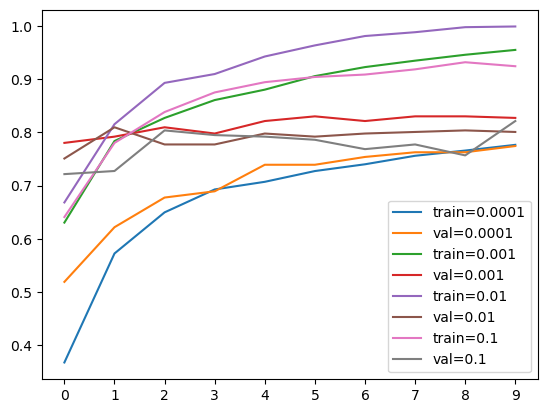

In [81]:
for learning_rate, history in scores.items():
    plt.plot(history['accuracy'], label = 'train=%s' % learning_rate)
    plt.plot(history['val_accuracy'], label = 'val=%s' % learning_rate)

plt.xticks(np.arange(10))
plt.legend()

## the best learning rate = 0.001

## Check pointing
 - Saving model when exact conditions met ( epoch and accuracy )


In [82]:
model.save_weights('model_v1.h5', save_format='h5')

In [83]:
!ls

clothing-dataset-small	       core.3071    README.md
cnn-clothing-prediction.ipynb  core.3162    single-gpu-tensorflow.ipynb
core.284		       core.3296    Untitled.ipynb
core.291		       core.4102
core.298		       model_v1.h5


In [84]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only = True,
    monitor = 'val_accuracy',
    mode='max'
)

In [85]:
best_learning_rate = 0.001

model = create_model(learningRate = best_learning_rate) 
history = model.fit(
    trained_ds,
    epochs=10,
    validation_data = val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
96/96 [==============================] - 14s 127ms/step - loss: 1.1009 - accuracy: 0.6209 - val_loss: 0.7132 - val_accuracy: 0.7742
Epoch 2/10
96/96 [==============================] - 11s 119ms/step - loss: 0.6375 - accuracy: 0.7813 - val_loss: 0.6299 - val_accuracy: 0.7977
Epoch 3/10
96/96 [==============================] - 11s 117ms/step - loss: 0.5128 - accuracy: 0.8269 - val_loss: 0.6206 - val_accuracy: 0.7889
Epoch 4/10
96/96 [==============================] - 11s 118ms/step - loss: 0.4362 - accuracy: 0.8572 - val_loss: 0.5577 - val_accuracy: 0.8182
Epoch 5/10
96/96 [==============================] - 12s 120ms/step - loss: 0.3721 - accuracy: 0.8882 - val_loss: 0.5498 - val_accuracy: 0.8299
Epoch 6/10
96/96 [==============================] - 11s 115ms/step - loss: 0.3320 - accuracy: 0.9003 - val_loss: 0.5658 - val_accuracy: 0.8123
Epoch 7/10
96/96 [==============================] - 12s 120ms/step - loss: 0.2935 - accuracy: 0.9188 - val_loss: 0.5519 - val_accuracy: 0.8446

## Adding more layers in between

In [86]:
def create_model_extra(learningRate = 0.01, inner_dense_size = 100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150,150,3)
    )
    base_model.trainable = False #ConvLayers will not change ( FREEZE )


    ## Create new top ( Dense layer that fit our dataset 
    inputs = keras.Input(shape=(150, 150, 3))
    #batch 32 * 5 * 5 * 2048
    base = base_model(inputs, training = False)
    ## Shrink 3d Base into 1D vector
    pooling = keras.layers.GlobalAveragePooling2D()
    # 32 * 2048
    vectors = pooling(base)
    # Add extra dense layer with ReLU 32*100
    inner = keras.layers.Dense(inner_dense_size, activation = 'relu')(vectors)

    # 32 * 10 [ 10 classes ]
    outputs = keras.layers.Dense(10)(inner) 
    model = keras.Model(inputs, outputs)


    ## To train the model, need an optimizer for weights
    optimizer = keras.optimizers.Adam(learning_rate=learningRate)
    # where optimizer make sure it's in the right direction
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)  # raw input for softmax activation

    model.compile(optimizer, loss=loss, metrics=['accuracy'])

    return model

In [105]:
scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = create_model_extra(learningRate = best_learning_rate, inner_dense_size = size)
    history = model.fit(trained_ds, epochs = 10, validation_data = val_ds)

    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 [==============================] - 15s 133ms/step - loss: 1.3864 - accuracy: 0.5235 - val_loss: 0.9294 - val_accuracy: 0.7331
Epoch 2/10
96/96 [==============================] - 12s 124ms/step - loss: 0.7989 - accuracy: 0.7350 - val_loss: 0.7630 - val_accuracy: 0.7478
Epoch 3/10
96/96 [==============================] - 12s 125ms/step - loss: 0.6047 - accuracy: 0.8038 - val_loss: 0.6419 - val_accuracy: 0.8006
Epoch 4/10
96/96 [==============================] - 12s 126ms/step - loss: 0.4886 - accuracy: 0.8449 - val_loss: 0.5830 - val_accuracy: 0.8035
Epoch 5/10
96/96 [==============================] - 12s 124ms/step - loss: 0.4152 - accuracy: 0.8680 - val_loss: 0.5650 - val_accuracy: 0.8152
Epoch 6/10
96/96 [==============================] - 12s 126ms/step - loss: 0.3573 - accuracy: 0.8924 - val_loss: 0.5590 - val_accuracy: 0.8123
Epoch 7/10
96/96 [==============================] - 12s 125ms/step - loss: 0.3099 - accuracy: 0.9100 - val_loss: 0.5942 - val_accuracy: 0.8

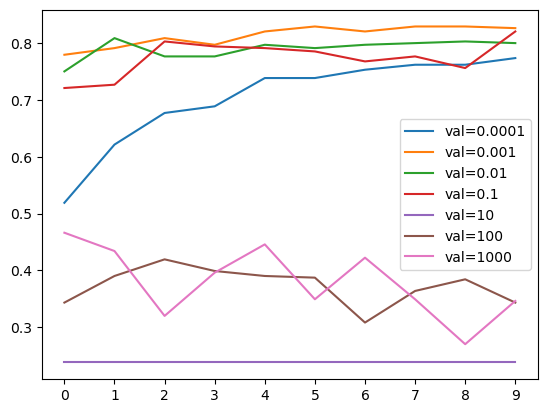

In [89]:
for size, history in scores.items():
#     plt.plot(history['accuracy'], label = 'train=%s' % size)
    plt.plot(history['val_accuracy'], label = 'val=%s' % size)

plt.xticks(np.arange(10))
# plt.yticks([0.75, 0.80, 0.825, 0.84])
plt.legend()

## Dropout layer

In [90]:
def create_model_dropout(learningRate = 0.01, inner_dense_size = 100, droprate = 0.2):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150,150,3)
    )
    base_model.trainable = False #ConvLayers will not change ( FREEZE )


    ## Create new top ( Dense layer that fit our dataset 
    inputs = keras.Input(shape=(150, 150, 3))
    #batch 32 * 5 * 5 * 2048
    base = base_model(inputs, training = False)
    ## Shrink 3d Base into 1D vector
    pooling = keras.layers.GlobalAveragePooling2D()
    # 32 * 2048
    vectors = pooling(base)
    # Add extra dense layer with ReLU 32*100
    inner = keras.layers.Dense(inner_dense_size, activation = 'relu')(vectors)
    # How much of the network we freeze 32*100
    drop = keras.layers.Dropout(droprate)(inner)

    # 32 * 10 [ 10 classes ]
    outputs = keras.layers.Dense(10)(drop) 
    model = keras.Model(inputs, outputs)


    ## To train the model, need an optimizer for weights
    optimizer = keras.optimizers.Adam(learning_rate=learningRate)
    # where optimizer make sure it's in the right direction
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)  # raw input for softmax activation

    model.compile(optimizer, loss=loss, metrics=['accuracy'])

    return model

In [92]:
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = create_model_dropout(learningRate = best_learning_rate, inner_dense_size = size, droprate = droprate)
    history = model.fit(trained_ds, epochs = 30, validation_data = val_ds)

    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
96/96 [==============================] - 15s 130ms/step - loss: 0.9865 - accuracy: 0.6626 - val_loss: 0.6584 - val_accuracy: 0.7859
Epoch 2/30
96/96 [==============================] - 12s 124ms/step - loss: 0.5292 - accuracy: 0.8152 - val_loss: 0.5783 - val_accuracy: 0.8211
Epoch 3/30
96/96 [==============================] - 12s 121ms/step - loss: 0.3547 - accuracy: 0.8768 - val_loss: 0.5435 - val_accuracy: 0.8240
Epoch 4/30
96/96 [==============================] - 12s 121ms/step - loss: 0.2716 - accuracy: 0.9097 - val_loss: 0.5733 - val_accuracy: 0.8182
Epoch 5/30
96/96 [==============================] - 12s 121ms/step - loss: 0.1901 - accuracy: 0.9475 - val_loss: 0.5613 - val_accuracy: 0.8240
Epoch 6/30
96/96 [==============================] - 12s 122ms/step - loss: 0.1372 - accuracy: 0.9651 - val_loss: 0.5887 - val_accuracy: 0.8152
Epoch 7/30
96/96 [==============================] - 12s 122ms/step - loss: 0.0959 - accuracy: 0.9831 - val_loss: 0.5860 - val_accuracy: 0.

Epoch 28/30
96/96 [==============================] - 12s 127ms/step - loss: 0.0197 - accuracy: 0.9951 - val_loss: 0.7209 - val_accuracy: 0.8270
Epoch 29/30
96/96 [==============================] - 12s 126ms/step - loss: 0.0185 - accuracy: 0.9961 - val_loss: 0.8462 - val_accuracy: 0.8094
Epoch 30/30
96/96 [==============================] - 12s 126ms/step - loss: 0.0227 - accuracy: 0.9928 - val_loss: 0.7077 - val_accuracy: 0.8416


0.5
Epoch 1/30
96/96 [==============================] - 15s 133ms/step - loss: 1.3166 - accuracy: 0.5639 - val_loss: 0.7787 - val_accuracy: 0.7361
Epoch 2/30
96/96 [==============================] - 12s 125ms/step - loss: 0.8338 - accuracy: 0.7236 - val_loss: 0.6456 - val_accuracy: 0.7771
Epoch 3/30
96/96 [==============================] - 12s 126ms/step - loss: 0.7090 - accuracy: 0.7539 - val_loss: 0.6230 - val_accuracy: 0.7771
Epoch 4/30
96/96 [==============================] - 12s 125ms/step - loss: 0.5970 - accuracy: 0.7920 - val_loss: 0.5656 - val_accurac

Epoch 25/30
96/96 [==============================] - 12s 124ms/step - loss: 0.6853 - accuracy: 0.7366 - val_loss: 0.5778 - val_accuracy: 0.8270
Epoch 26/30
96/96 [==============================] - 12s 126ms/step - loss: 0.6993 - accuracy: 0.7135 - val_loss: 0.5811 - val_accuracy: 0.8123
Epoch 27/30
96/96 [==============================] - 12s 124ms/step - loss: 0.7020 - accuracy: 0.7282 - val_loss: 0.5965 - val_accuracy: 0.8152
Epoch 28/30
96/96 [==============================] - 12s 125ms/step - loss: 0.6717 - accuracy: 0.7262 - val_loss: 0.5786 - val_accuracy: 0.8182
Epoch 29/30
96/96 [==============================] - 12s 126ms/step - loss: 0.6498 - accuracy: 0.7357 - val_loss: 0.5864 - val_accuracy: 0.8123
Epoch 30/30
96/96 [==============================] - 12s 125ms/step - loss: 0.6437 - accuracy: 0.7399 - val_loss: 0.5926 - val_accuracy: 0.8182




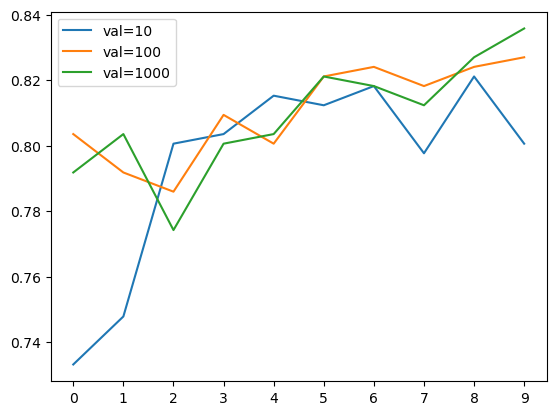

In [108]:
for droprate, history in scores.items():
#     plt.plot(history['accuracy'], label = 'train=%s' % droprate)
    plt.plot(history['val_accuracy'], label = 'val=%s' % droprate)

# score_0_5 = scores[0.5]
# plt.plot(score_0_5['val_accuracy'], label = 'val=%s' % 0.5)
plt.xticks(np.arange(10))
plt.legend()


## Data Augmentation
- different data augmentation
    - transformation ( flip horizontally, vertically )
    - Rotation ( clockwise, anti-clockwise )
    - Shifting
    - Shearing
    - Zooming in/out
- training the same model but with augmentations
- how to select the data augmentations
    - use your own judgement that make sense
    - have a look at the data dataset
    - what kind of variations are there?
    - are the objects always centered?
    - tune it as a hyperparamter
        - train it for 10-20 EPOCHS
        - is it better? Yes? No!?

In [106]:
train_gen_augmented = ImageDataGenerator(
    preprocessing_function= preprocess_input,
#     rotation_range=30,
#     width_shift_range=10.0,
#     height_shift_range=10.0,
    shear_range=1.0,
    zoom_range=0.1,
    horizontal_flip=False,
    vertical_flip=True
)
trained_ds = train_gen_augmented.flow_from_directory(
    './clothing-dataset-small/train',
     target_size=(150, 150),
    batch_size=32
)

# keep the validation dataset as is
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [109]:
best_drop_rate = 0.2
model = create_model_dropout(
    learningRate = best_learning_rate,
    inner_dense_size = size,
    droprate = best_drop_rate)
history = model.fit(trained_ds, epochs = 50, validation_data = val_ds)

Epoch 1/50
96/96 [==============================] - 28s 268ms/step - loss: 1.3135 - accuracy: 0.5665 - val_loss: 0.7806 - val_accuracy: 0.7537
Epoch 2/50
96/96 [==============================] - 25s 261ms/step - loss: 0.9622 - accuracy: 0.6760 - val_loss: 0.6846 - val_accuracy: 0.7654
Epoch 3/50
96/96 [==============================] - 25s 264ms/step - loss: 0.8709 - accuracy: 0.6992 - val_loss: 0.6796 - val_accuracy: 0.7566
Epoch 4/50
96/96 [==============================] - 25s 261ms/step - loss: 0.8032 - accuracy: 0.7151 - val_loss: 0.7396 - val_accuracy: 0.7537
Epoch 5/50
96/96 [==============================] - 25s 262ms/step - loss: 0.7640 - accuracy: 0.7334 - val_loss: 0.6759 - val_accuracy: 0.7801
Epoch 6/50
96/96 [==============================] - 25s 264ms/step - loss: 0.7032 - accuracy: 0.7575 - val_loss: 0.6614 - val_accuracy: 0.7859
Epoch 7/50
96/96 [==============================] - 25s 263ms/step - loss: 0.6651 - accuracy: 0.7728 - val_loss: 0.6194 - val_accuracy: 0.7918

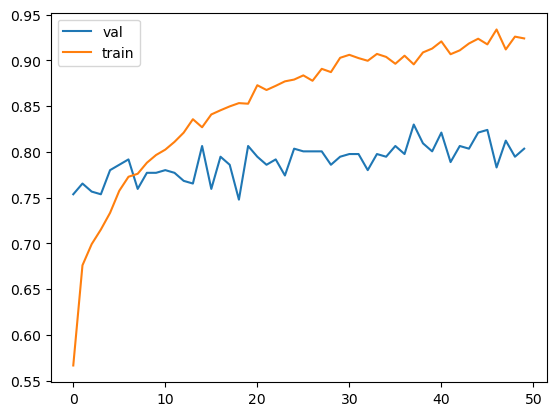

In [110]:
augmentedDataHist = history.history
plt.plot(augmentedDataHist['val_accuracy'], label='val')
plt.plot(augmentedDataHist['accuracy'], label='train')

plt.legend()


## Larger model training
- input image of 299*299

In [111]:
def create_model_input(input_size= 150, learningRate = 0.01, inner_dense_size = 100, droprate = 0.2):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size,3)
    )
    base_model.trainable = False #ConvLayers will not change ( FREEZE )


    ## Create new top ( Dense layer that fit our dataset 
    inputs = keras.Input(shape=(input_size, input_size, 3))
    #batch 32 * 5 * 5 * 2048
    base = base_model(inputs, training = False)
    ## Shrink 3d Base into 1D vector
    pooling = keras.layers.GlobalAveragePooling2D()
    # 32 * 2048
    vectors = pooling(base)
    # Add extra dense layer with ReLU 32*100
    inner = keras.layers.Dense(inner_dense_size, activation = 'relu')(vectors)
    # How much of the network we freeze 32*100
    drop = keras.layers.Dropout(droprate)(inner)

    # 32 * 10 [ 10 classes ]
    outputs = keras.layers.Dense(10)(drop) 
    model = keras.Model(inputs, outputs)


    ## To train the model, need an optimizer for weights
    optimizer = keras.optimizers.Adam(learning_rate=learningRate)
    # where optimizer make sure it's in the right direction
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)  # raw input for softmax activation

    model.compile(optimizer, loss=loss, metrics=['accuracy'])

    return model

In [121]:
train_gen_augmented = ImageDataGenerator(
    preprocessing_function= preprocess_input,
#     rotation_range=30,
#     width_shift_range=10.0,
#     height_shift_range=10.0,
    shear_range=10.0,
    zoom_range=0.1,
    horizontal_flip=False,
    vertical_flip=True
)
trained_ds = train_gen_augmented.flow_from_directory(
    './clothing-dataset-small/train',
     target_size=(299, 299),
    batch_size=32
)

# keep the validation dataset as is
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(299, 299),
    batch_size=32
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [124]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only = True,
    monitor = 'val_accuracy',
    mode='max'
)

In [125]:
model = create_model_input(
    input_size=299, 
    learningRate = 0.0005,
    inner_dense_size = size,
    droprate = best_drop_rate)
history = model.fit(trained_ds, epochs = 50, validation_data = val_ds, callbacks=[checkpoint])

Epoch 1/50
96/96 [==============================] - 67s 675ms/step - loss: 0.9175 - accuracy: 0.6946 - val_loss: 0.5251 - val_accuracy: 0.8094
Epoch 2/50
96/96 [==============================] - 64s 668ms/step - loss: 0.5911 - accuracy: 0.8022 - val_loss: 0.4441 - val_accuracy: 0.8299
Epoch 3/50
96/96 [==============================] - 64s 668ms/step - loss: 0.4890 - accuracy: 0.8302 - val_loss: 0.4382 - val_accuracy: 0.8475
Epoch 4/50
96/96 [==============================] - 63s 651ms/step - loss: 0.4505 - accuracy: 0.8445 - val_loss: 0.4152 - val_accuracy: 0.8534
Epoch 5/50
96/96 [==============================] - 64s 660ms/step - loss: 0.4018 - accuracy: 0.8589 - val_loss: 0.4400 - val_accuracy: 0.8475
Epoch 6/50
96/96 [==============================] - 64s 666ms/step - loss: 0.3569 - accuracy: 0.8742 - val_loss: 0.4456 - val_accuracy: 0.8651
Epoch 7/50
96/96 [==============================] - 64s 664ms/step - loss: 0.3485 - accuracy: 0.8765 - val_loss: 0.3969 - val_accuracy: 0.8651

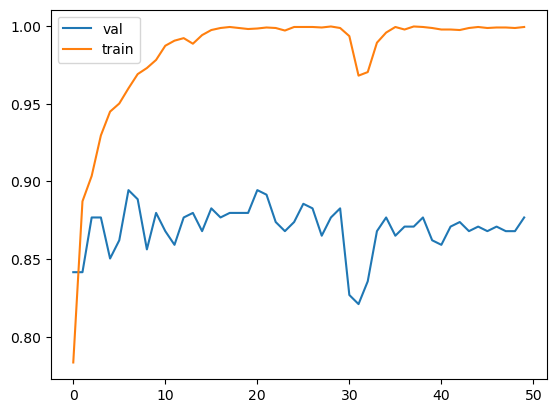

In [120]:
largeDataHist = history.history
plt.plot(largeDataHist['val_accuracy'], label='val')
plt.plot(largeDataHist['accuracy'], label='train')

plt.legend()


## Using the Model
- in a separate notebook